In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import operator
import seaborn as sns
# Setup matplotlib to work inside the notebook using
%matplotlib inline

In [3]:
df = pd.read_csv('Q7.csv')

In [4]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1552222 entries, 0 to 1552221
Data columns (total 3 columns):
year       1552222 non-null int64
keyword    1552204 non-null object
count      1552222 non-null int64
dtypes: int64(2), object(1)
memory usage: 35.5+ MB


,year,keyword,count
0,2015,task-level,8
1,2013,cvdhd,1
2,2010,youtube-gener,1
3,2000,cadastr,1
4,1991,througput,2


In [5]:
arr = df.pivot('year', 'keyword', 'count').fillna(0).astype(int)
print("The shape of the \'year-keyword\' matrix is: %r*%r" %(arr.shape[0],arr.shape[1]))
arr.tail()

The shape of the 'year-keyword' matrix is: 82*539664


keyword,nan,+0,+0.2,+0.5,+0.6,+07,+1,+1.0,+1.4,+10,...,𝔽,𝔽2,𝔽p,𝔽p-code,𝔽q,𝕀,𝕊,𝕋,𝕍ddcmos,𝜉
year,,,,,,,,,,,,,,,,,,,,,
2012,0,1,0,0,0,0,58,0,0,1,...,0,1,1,1,0,0,0,0,0,1
2013,2,1,0,1,0,0,60,0,0,1,...,0,0,0,0,1,1,1,1,0,0
2014,4,0,0,2,0,0,61,0,0,2,...,1,0,1,0,0,0,0,0,0,0
2015,1,0,0,0,0,0,49,0,1,2,...,0,0,0,0,0,0,0,0,1,0
2016,0,0,0,0,0,0,7,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
std = {} #a dictionary which stores (keyword, variance)
for i in arr.columns:
    std[i] = arr.loc[:, i].std()
##sort the dictionary into a sorted set of tuples
sorted_x = sorted(std.items(), key=operator.itemgetter(1), reverse=True)

In [7]:
k = 10 #set the value of k as you want(k<=100)
top_k_values = [i[0] for i in sorted_x][:k]
print("The top %r values of keyword is: %r" %(k, top_k_values))

The top 10 values of keyword is: ['base', 'system', 'use', 'network', 'model', 'analysi', 'data', 'algorithm', 'approach', 'control']


/Users/Nicolas/anaconda2/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


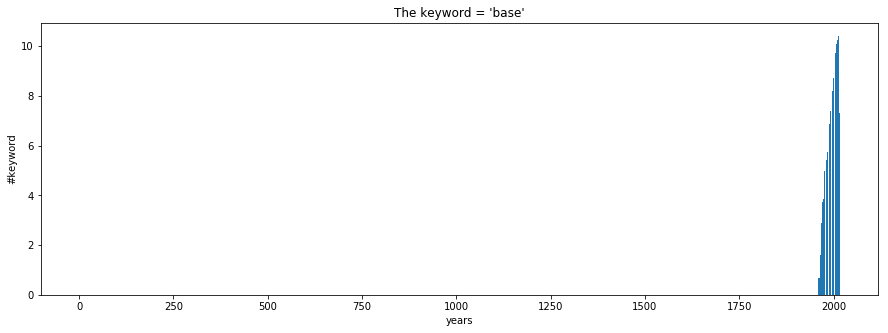

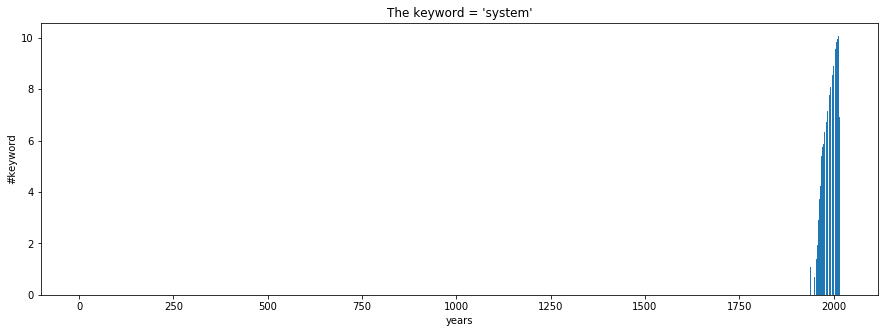

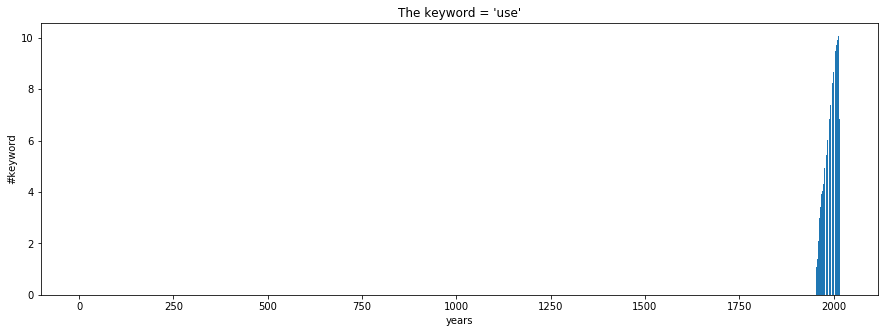

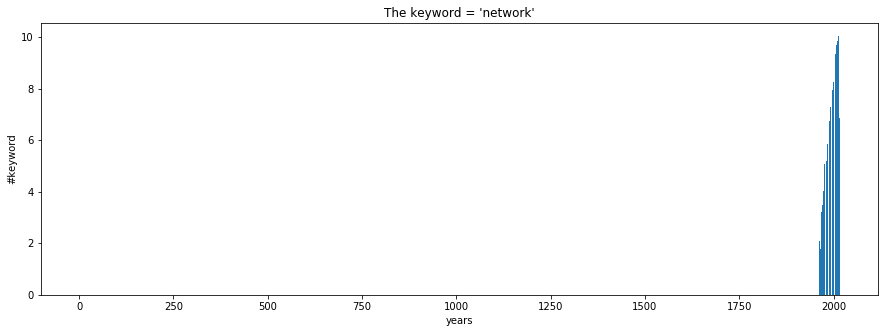

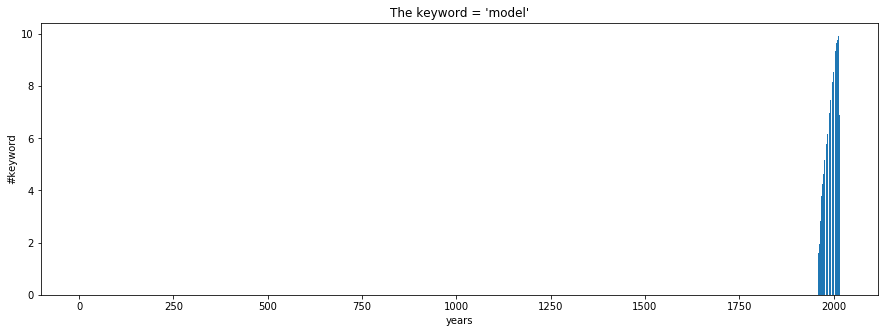

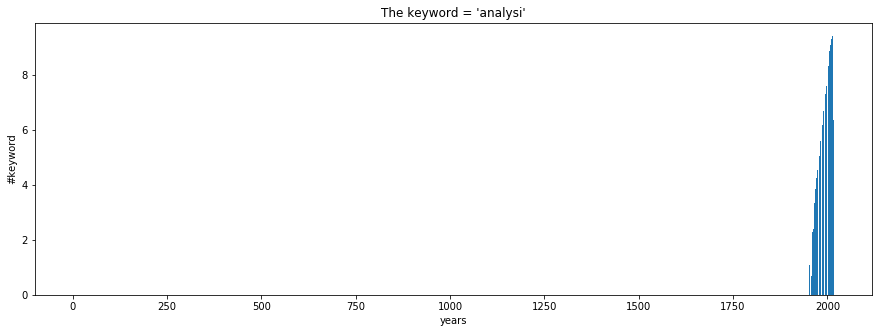

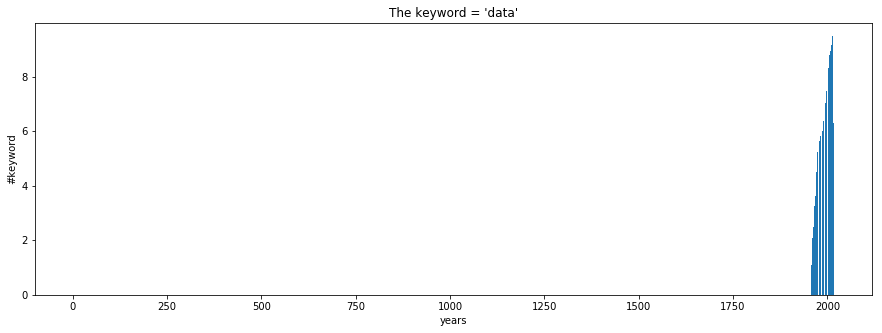

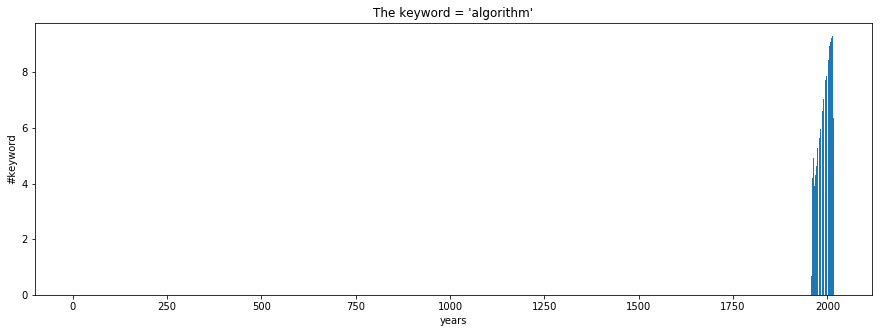

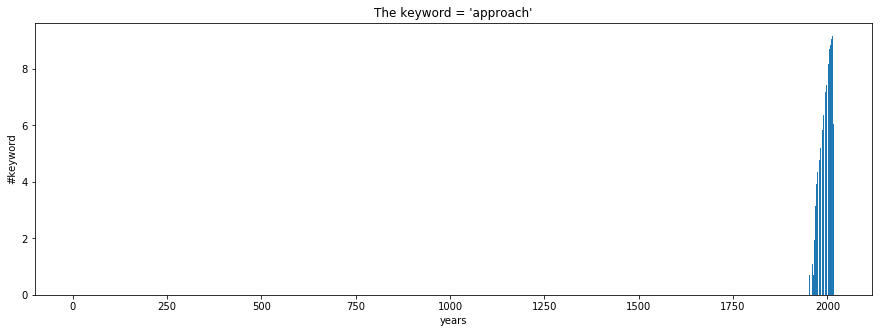

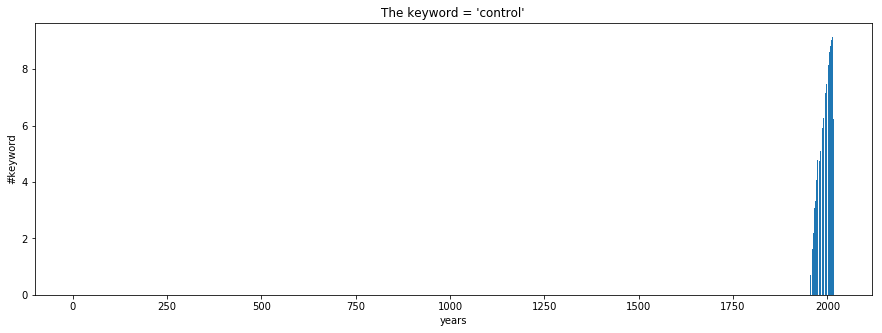

In [9]:
for i in range(k):
    plt.figure(figsize=(15, 5))
    plt.title('The keyword = %r' %sorted_x[i][0])
    plt.xlabel('years')
    plt.ylabel('#keyword')
    plt.bar(arr.index, np.log(arr.loc[:, sorted_x[i][0]])) # we normalize the 'y' to make data more visual
plt.show()